<h1 align="center">Credit Punctuation Model</h1> 


<p align="left">
<img align="right" src="https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png">
Developed by: Emiliano Mena González and Jorge Alberto Hernández Hernández </br></br>
ID: 728407 and 730342 </br></br>
University: Instituto Tecnológico y de Estudios Superiores de Occidente (ITESO) </br></br>
Degree: Finanacial Engineer </br></br>
Semester: 10th </br></br>
Date: 20/02/2024 </br></br>
</p>



<p align="center">
  <img src="https://concepto.de/wp-content/uploads/2014/10/credito-bancario-3-e1551053875344.jpg">
</p>

In [1]:
# Libraries and dependencies
import main as m
import visualizations as v

<h2>Introduction</h2>
<h3>Main objective</h3>
<p align="justify">
The main objective of this project is to create a Personal Credit Punctuation Model that classify every new record on one of three possible scores(Poor, Standard or Good).
</p>
<h3>Data</h3>
<p align="justify">
The data we are taking to do the model is the dataset contained in the csv file called "train.csv", this dataset has 28 columns (variables) and 100,000 rows (records). The last column of the dataset is the Credit_Score variable that will be the reference point to see the accuracy of the model. Below we have the first 5 record of the dataset to see what variables we have, what type of value they are.
</p>

In [2]:
m.df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


<p align="justify">
To see more clearly the type of data we will work with we have a little dataset that has some valious information to know what proccesses we will need to do in order to clean the data. The info we have is first of all the type of data, if they are null values, the present values and the unique values.
</p>

In [3]:
m.data_info

,Type,NA_values,Present_values,Unique_values
Variable_name,,,,
ID,object,0,100000,100000
Customer_ID,object,0,100000,12500
Month,object,0,100000,8
Name,object,9985,90015,10139
Age,object,0,100000,1788
SSN,object,0,100000,12501
Occupation,object,0,100000,16
Annual_Income,object,0,100000,18940
Monthly_Inhand_Salary,float64,15002,84998,13235


<h3>Data cleaning</h3>
<h4>Delete the data it won´t be used</h4>
<p align="justify">
To start with the data cleaning, first we delete the data that won´t be used on the creation of the punctuation model. The data deleted is:

- ID: It is only a descriptive variable of the person who is being punctuated.
- Month: The model is the same in every moment of the year so it doesn´t matter the month of the record evaluated.
- Age: The age doesn´t has a correlation with the final score.
- SSN: Is another descriptive variable of the person.
- Occupation: It doesn´t matter on what the person evaluated works.
- Num_Bank_Accounts: This info is not necessary considering the dataset has already a Credit_Mix variable.
- Num_Credit_Card: This info is not necessary considering the dataset has already a Credit_Mix variable.
- Num_of_Loan: This info is not necessary considering the dataset has already a Credit_Mix variable.
- Type_of_Loan: This info is not necessary considering the dataset has already a Credit_Mix variable.
- Payment_of_Min_Amount: There are more relevant variables of payment.
- Payment_Behaviour: There are more relevant variables of payment.
</p>

<h4>Null values</h4>
<p align="justify">
After deleting the variables that doesn´t have relevance on the model, the next step is to fill the null values. After seeing the variables that have null values, we separate them in two groups. The first group are the variables that can be filled with the values of other records from the same person, to do this we consider the Customer_ID to assign the same values. The second group are the variables that need to be filled with 0, this is because are variables that change on every record and are considered as 0. Below we can see a table that shows which variables are going on both fill methods.
</p>

|Filled with customer info|Filled with 0          |
|-------------------------|-----------------------|
|Name                     |Num_of_Delayed_Payment |
|Annual_Income            |Num_Credit_Inquiries   |
|Monthly_Inhand_Salary    |Amount_invested_monthly|
|Interest_Rate            |Monthly_Balance        |
|Credit_Mix               |                       |
|Credit_History_Age       |                       |

<h4>Numeric values</h4>
<p align="justify">
Now that we have a dataset with all the present values we are only missing to assign the correct format to every variable. The data has multiple variables that are numbers but of string type, to be able to be used the number variables we need to changed them to a numerical type, in this case float. This variables are: 

- Annual_Income 
- Num_of_Delayed_Payment
- Changed_Credit_Limit
- Outstanding_Debt
- Amount_invested_monthly
- Monthly_Balance
</p>
<h4>Change age format</h4>
<p align="justify">
In this part we need to change the Credit_History_Age variable format from "NN Years and NN Months" to only the number of months. Now we can see the data cleaned and ready to be used on the model creation.
<p>

<h4>Outliers</h4>
<p align="justify"> 
It is necessary to see if the selected variables have any outliers that can difficult the model. Down we have a table with the quartiles, maximum and minimum of the variables to see if there are any outliers.
</p>

In [4]:
m.data_stadistics

,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,1.616206e+05,4188.592303,73.213360,21.068780,28.779410,10.246841,27.208880,1426.220376,32.285173,224.608720,1403.118217,608.863270,3.000000e+22
std,1.297796e+06,3180.036303,468.665823,14.860104,218.114813,6.768353,191.308723,1155.129026,5.116875,99.652271,8306.041270,2001.382002,3.162151e+24
min,7.005930e+03,303.645417,1.000000,-5.000000,0.000000,0.000000,0.000000,0.230000,20.000000,8.000000,0.000000,0.000000,0.000000e+00
25%,1.945333e+04,1624.937917,8.000000,10.000000,8.000000,4.990000,3.000000,566.072500,28.052567,148.000000,30.306660,67.431711,2.678949e+02
50%,3.757238e+04,3087.595000,14.000000,18.000000,13.000000,9.250000,5.000000,1166.155000,32.305784,222.000000,69.249473,128.698239,3.348362e+02
75%,7.269021e+04,5947.364167,20.000000,28.000000,18.000000,14.660000,9.000000,1945.962500,36.496663,305.000000,161.224249,255.038698,4.677306e+02
max,2.383470e+07,15204.633333,5789.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,404.000000,82331.000000,10000.000000,3.333333e+26


<p align="justify">
Some possible variables with outliers are:

- Annual_Income
- Interest_Rate
- Num_of_Delayed_Payment
- Num_Credit_Inquiries
- Total_EMI_per_month
- Amount_invested_monthly
- Monthly_Balance

But to be sure we have the violinplots of this variables to see it more clearly.
</p>

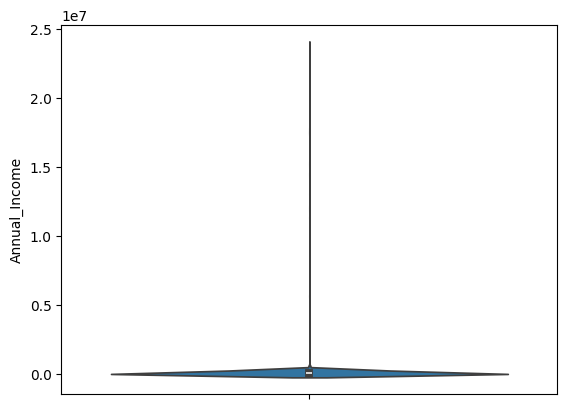

In [5]:
v.violinplots(m.df2['Annual_Income'])

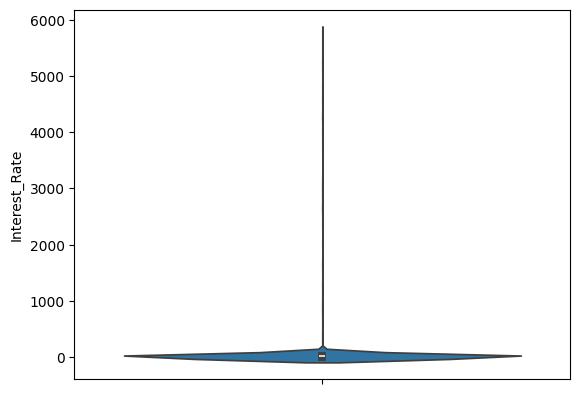

In [6]:
v.violinplots(m.df2['Interest_Rate'])

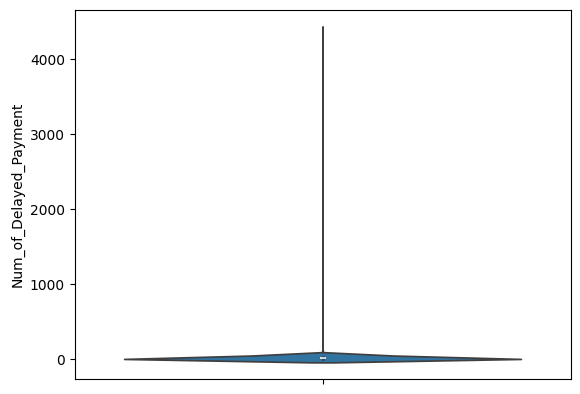

In [7]:
v.violinplots(m.df2['Num_of_Delayed_Payment'])

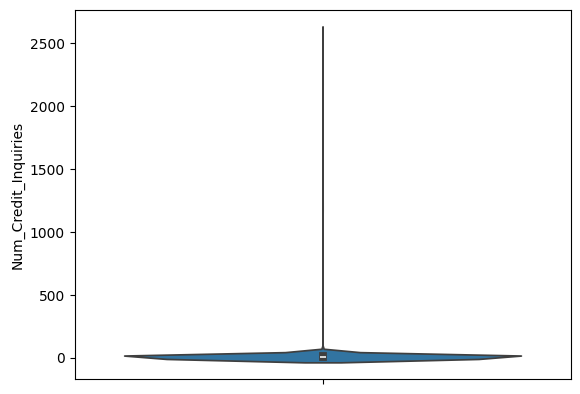

In [8]:
v.violinplots(m.df2['Num_Credit_Inquiries'])

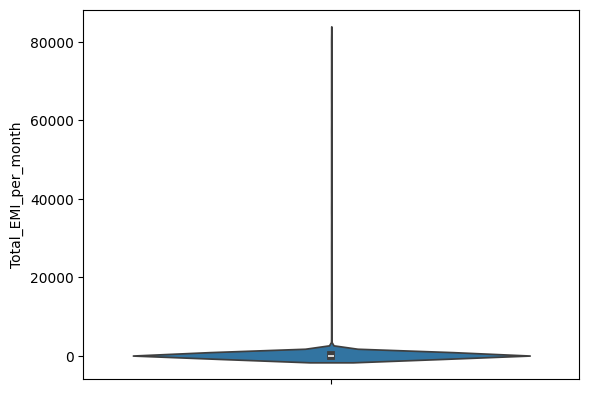

In [9]:
v.violinplots(m.df2['Total_EMI_per_month'])

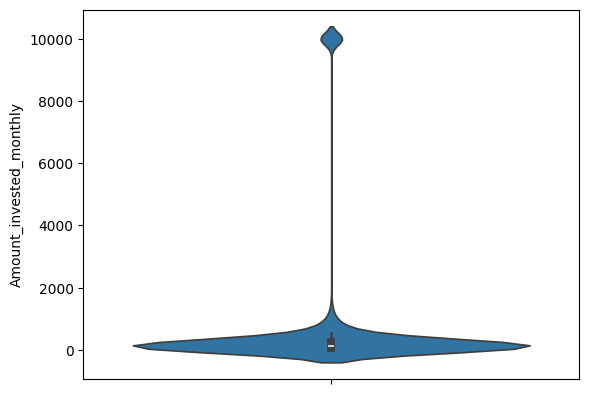

In [10]:
v.violinplots(m.df2['Amount_invested_monthly'])

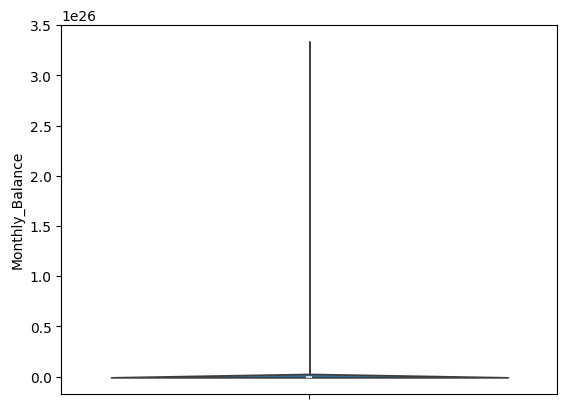

In [11]:
v.violinplots(m.df2['Monthly_Balance'])

As we expected, the previous variables contain visible outliers. We replaced this outliers with the value of the same person before (take the last value of the same Customer_ID). We finally have our cleaned data available to be used in the model creation, the data look like:

In [12]:
m.df3.head(5)

,Customer_ID,Name,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,CUS_0xd40,Aaron Maashoh,19114.12,1824.843333,3.0,3,7.0,11.27,4.0,Good,809.98,26.822620,271,49.574949,80.415295,312.494089,Good
1,CUS_0xd40,Aaron Maashoh,19114.12,1824.843333,3.0,-1,0.0,11.27,4.0,Good,809.98,31.944960,271,49.574949,118.280222,284.629162,Good
2,CUS_0xd40,Aaron Maashoh,19114.12,1824.843333,3.0,3,7.0,0.00,4.0,Good,809.98,28.609352,271,49.574949,81.699521,331.209863,Good
3,CUS_0xd40,Aaron Maashoh,19114.12,1824.843333,3.0,5,4.0,6.27,4.0,Good,809.98,31.377862,271,49.574949,199.458074,223.451310,Good
4,CUS_0xd40,Aaron Maashoh,19114.12,1824.843333,3.0,6,0.0,11.27,4.0,Good,809.98,24.797347,271,49.574949,41.420153,341.489231,Good


<h2>Model</h2>
<h3>Model bases</h3>
<p align="justify">
The developed credit punctuation model is a traditional one that takes it principal inspiration on the FICO model, there are multiple traditional models (FICO, Vantage, Credit Karma, Equifax, etc.) but we selected the FICO as a base because it´s the most used on the United States and multiple other models are based on this one. So to select the variables and the percentage of the final score they will have we looked on the FICO model pillars:

1. Payment history: essentially how frequently a borrower makes payments on time. Accounts for missed or late payments.
2. Amounts owed: how much a borrower owes, includes credit card balances, loans, and mortgages.
3. Credit history: how long a borrower has had credit accounts. Including age of their oldest account and the average age of all their accounts.
4. Credit mix: examines types of credit accounts a borrower has—credit cards, loans, and mortgages.
5. New credit: evaluates the number of recently opened credit accounts and credit applications. 
Also looks at the borrower’s overall credit history.

It is not known for sure how they are weighted every one of this pillars on the final score of the model, but lot of sources say that the distribution is the next:
</p>

|Pillar                  |Percentage|
|------------------------|----------|
|Payment history         |35%       |
|Amounts owed            |30%       |
|Length of credit history|15%       |
|Credit mix              |10%       |
|New credit              |10%       |

<p align="justify">
We add a sixth pillar to our model, this pillar is the Credit utilization. It is important because if a person is using properly his credit line it could be increased and vice versa. Below we can see the final conformation of the pillars and the variables selected for the model structure:
</p>

<table>
    <thead>
        <tr>
            <th>Pillar</th>
            <th>Percentage</th>
            <th>Variables</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td rowspan=2>Payment history </td>
            <td>20%  </td>
            <td>Delay_from_due_date  </td>
        </tr>
        <tr>
            <td>15%  </td>
            <td>Num_of_Delayed_Payment  </td>
        </tr>
        <tr>
            <td>Amounts owed  </td>
            <td>30%  </td>
            <td>Outstanding_Debt  </td>
        </tr>
        <tr>
            <td>Lengh of credit history </td>
            <td>10%  </td>
            <td>Credit_History_Age  </td>
        </tr>
        <tr>
            <td>Credit mix  </td>
            <td>15%  </td>
            <td>Credit_Mix  </td>
        </tr>
        <tr>
            <td>New credit  </td>
            <td>10%  </td>
            <td>Num_Credit_Inquiries  </td>
        </tr>
    </tbody>
</table>

<p align="justify">
After seting the punctuation variables with their respective percentages, we gave the final score to every record. Down below we have some of the scores on a table, this table contains:

- Customer_ID and Name: Descriptive data of the person that is being scored.
- Model_Punctuation: The final punctuation the model assigned for every person, the range of the punctuation is between 170 and 1000.
- Model_Score: The final score that the model gave, if the punctuation was under 600 the score is Poor, if it is between 600 and 800 is Standard and if it is above 800 it is Good.
- Original_Score: The original score that the dataset had.
</p>

In [13]:
m.results

,Customer_ID,Name,Model_Punctuation,Model_Score,Original_Score
0,CUS_0xd40,Aaron Maashoh,930,Good,Good
1,CUS_0xd40,Aaron Maashoh,960,Good,Good
2,CUS_0xd40,Aaron Maashoh,930,Good,Good
3,CUS_0xd40,Aaron Maashoh,880,Good,Good
4,CUS_0xd40,Aaron Maashoh,860,Good,Good
...,...,...,...,...,...
99995,CUS_0x942c,Nicks,820,Good,Poor
99996,CUS_0x942c,Nicks,820,Good,Poor
99997,CUS_0x942c,Nicks,820,Good,Poor
99998,CUS_0x942c,Nicks,850,Good,Standard


In [14]:
print(f'The accuracy of the model was of {round(m.accuracy*100,2)} %')

The accuracy of the model was of 62.98 %


<p align="justify">
Now we can see the Confusion Matrix that the majority of the model errors are on the Good model assigned that are on reality Poor. The model assigned Good are the scores with more accuracy. 
</p>

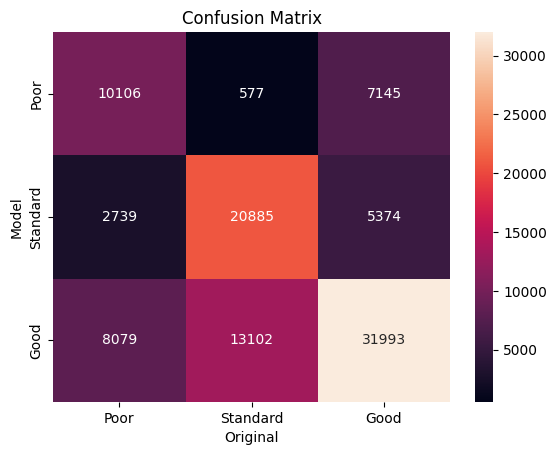

In [15]:
v.heatmap(m.results['Original_Score'],m.results['Model_Score'],['Poor', 'Standard','Good'])

<h2>Conclusions</h2>
<p align="justify">
After we developed the model and get the final scores we can say that:

1. The variables and parameters that are generally used, are completely arbitrary, so in this case you’ll have to believe that we have chosen the best ones, as we do with FICO.
2. The variables that we finally used where the ones that gave us a best accuracy, this is interesting considering that the other models we were trying they considered other variables that are out of the FICO pillars. So despite we weren´t able to get a more precise accuracy, the variables are not the problem, the problem may be the ranges of values that we are taking as reference to give the punctuation.
3. Using non complex models (with added variables) can lead us to a model accuracy maybe above 50, but can’t take us to an optimal accuracy, so this is not an optimal way to found our desired model; probably using machine learning could get us where we want to be.
</p>